In [1]:
import time
from tictactoe.game import TicTacToe
from tictactoe.human import Human
from tictactoe.agent import Agent

playerX = Agent('AI1')
playerY = Agent('AI2')
playerZ = Human('Human')

# AI vs AI

In [2]:
# Single game

board = TicTacToe(playerX, playerY)

while not board.finished:
    board.next_turn()
    
display(board)

AI1 chooses move 2
AI2 chooses move 4
AI1 chooses move 1
AI2 chooses move 8
AI1 chooses move 5
AI2 chooses move 7
AI1 chooses move 6
AI2 chooses move 3
AI1 chooses move 9
AI1 WINS!!!!!!!!! *CONFETTI*


In [3]:
# Multiple games (train the AI)

history = {
    playerX: [0],
    playerY: [0],
    None: [0]
}

playerX.learning_rate = 0.1
playerX.explore = 0.1
playerY.learning_rate = 0.01
playerY.explore = 0.3

board = TicTacToe(playerX, playerY)
board.print = False

for i in range(20000):
    if i % 1000 == 0:
        print('training: {}/20000'.format(i))
    
    while not board.finished:
        board.next_turn()
        
    for p in history:
        history[p].append(history[p][-1])
    
    history[board.winner][-1] += 1
        
    board.reset()
    board.turn_p1 = i % 2  # take turns in starting
    
print("FINISHED!")
print(playerX.name, history[playerX][-1])
print(playerY.name, history[playerY][-1])

training: 0/20000
training: 1000/20000
training: 2000/20000
training: 3000/20000
training: 4000/20000
training: 5000/20000
training: 6000/20000
training: 7000/20000
training: 8000/20000
training: 9000/20000
training: 10000/20000
training: 11000/20000
training: 12000/20000
training: 13000/20000
training: 14000/20000
training: 15000/20000
training: 16000/20000
training: 17000/20000
training: 18000/20000
training: 19000/20000
FINISHED!
AI1 6603
AI2 3039


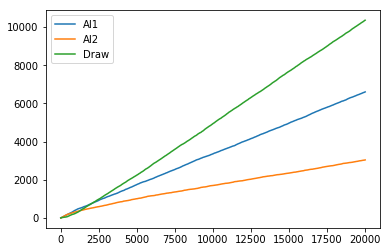

In [4]:
# Evaluate performance

import matplotlib.pyplot as plt

plt.plot(history[playerX], label=playerX.name)
plt.plot(history[playerY], label=playerY.name)
plt.plot(history[None], label='Draw')
plt.legend()
plt.show()

# AI vs Human

In [5]:
# Run this cell to create a board

playerX.explore = 0
board = TicTacToe(playerX, playerZ)
board.turn_p1 = True  # player 1 begins

In [14]:
# Run this cell multiple times to play the game

display(board)
time.sleep(0.1)
board.next_turn()
display(board)

AI1 chooses move 7
AI1 WINS!!!!!!!!! *CONFETTI*
